# Genetic Algorithm

In [1]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [2]:
class City:
    def __init__(self, y, x):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"


In [3]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness


In [4]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [5]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [6]:
def rankRoutes(population):
    """
    This function sorts the given population in decreasing order of the fitness score.
    """
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)



In [7]:
def selection(popRanked, eliteSize):
    """
    This function takes in a population sorted in decreasing order of fitness score, and chooses a mating pool from it.
    It returns a list of indices of the chosen mating pool in the given population.
    """
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults


In [8]:
def matingPool(population, selectionResults):
    """
    This function takes in a population and returns the chosen mating pool which is a subset of the population.
    """
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool


In [9]:
def breed(parent1, parent2):
    """
    This function should breed both parents (routes) and return a child route according to the ordered crossover algorithm  
    mentioned above. Please fill in the code to do so.
    """
    # Declaring child 
    child = [] 
    
    # Storing parent info
    parentChild1 = [] 
    parentChild2 = []
    
    # gene 1 & 2
    gene1 = int(random.random() * len(parent1))
    gene2 = int(random.random() * len(parent2))
    
    # Getting the max and min
    startingGene = min(gene1, gene2)
    endingGene = max(gene1, gene2)
    
    # Gets random values
    for i in range(startingGene, endingGene):
        parentChild1.append(parent1[i])
        
    # initilize parentChild2 with values it did not get from parent1
    parentChild2 = [item for item in parent2 if item not in parentChild1]
    
    # initilizing child
    child = parentChild1 + parentChild2
    
    # returns child
    return child


In [10]:
def breedPopulation(matingpool, eliteSize):
    """
    This function should return the offspring population from the current population using the breed function. It should 
    retain the eliteSize best routes from the current population. Then it should use the breed function to mate
    members of the population, to fill out the rest of the next generation. You may decide how to choose mates for individuals.
    """
    
    children = []
    size = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    # mate members of population
    for i in range(0, size):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    
    # Returns children population derived from current population using breed function 
    return children


In [11]:
def mutate(individual, mutationRate):
    """
    This function should take in an individual (route) and return a mutated individual. Assume mutationRate is a probability
    between 0 and 1. Use the swap mutation described above to mutate the individual according to the mutationRate. Iterate 
    through each of the cities and swap it with another city according to the given probability.
    """
    #takes in a route and returns mutated version 
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapPlace = int(random.random() * len(individual))
            
            location1 = individual[swapped]
            location2 = individual[swapPlace]
            
            individual[swapped] = location2
            individual[swapPlace] = location1   
    
    # returns mutated individual
    return individual

In [12]:
def mutatePopulation(population, mutationRate):
    """
    This function should use the above mutate function to mutate each member of the population. Simply iterate over the 
    population and mutate each individual using the mutationRate.
    """
    mutatedPop = []
    # for loop for to itterate through each individual, mutationg using the mutationRate 
    for i in range(0, len(population)):
        mutatedi = mutate(population[i], mutationRate)
        mutatedPop.append(mutatedi)  
   # returns mutatedPop     
    return mutatedPop


In [13]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    """
    This function takes in the current generation, eliteSize and mutationRate and should return the next generation.
    Please use all the above defined functions to do so, some hints are in the above paragraph.
    """ 
    # rank routs
    popRanked = rankRoutes(currentGen)
    # select potential parents 
    selectionResults = selection(popRanked, eliteSize)
    # creating matingPool 
    matingpool = matingPool(currentGen, selectionResults)
    # creating children
    children = breedPopulation(matingpool, eliteSize)
    #applying the mutation 
    nextGeneration = mutatePopulation(children, mutationRate) 
    #returns nextGeneration
    return nextGeneration

In [14]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    """
    This function creates an initial population, then runs the genetic algorithm according to the given parameters. 
    """
    # declare/initilize variables
    itlPop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(itlPop)[0][1]))
    # loop through diff generation 
    for i in range(0, generations):
        itlPop = nextGeneration(itlPop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(itlPop)[0][1]))
    bestRteIdx = rankRoutes(itlPop)[0][0]
    # initilize return var
    bestRoute = itlPop[bestRteIdx]
    
    # returns bestRoute
    return bestRoute

In [15]:
cityList = []
NewYork= City( int(40.71 * 100), int( -74.00 * 100)) 
LA= City(3405,-11824) 
Chicago=City(4187,-8762)
Houston=City(2976,-9536)
Philly=City(3995,-7516)
cityList.append(NewYork)
cityList.append(LA)
cityList.append(Chicago)
cityList.append(Houston)
cityList.append(Philly)


In [16]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=5, mutationRate=0.01, generations=500)


Initial distance: 9256.22933537916
Final distance: 9256.22933537916


[(-7400,4071), (-8762,4187), (-11824,3405), (-9536,2976), (-7516,3995)]

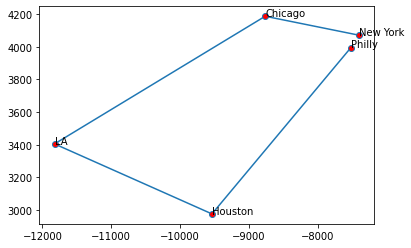

In [17]:
# Plotting
fig, ax1 = plt.subplots(ncols=1)
y=[4071,4187,3405,2976,3995]
x=[-7400,-8762,-11824,-9536,-7516]
n=['New York','Chicago',"LA","Houston","Philly"]
ax1.plot(x, y, marker="o", markerfacecolor="r")
for i, txt in enumerate(n):
    ax1.annotate(txt, (x[i], y[i]))


In [18]:
cityList = []
NewYork= City( int(40.71 * 100), int( -74.00 * 100)) 
LA= City(3405,-11824) 
Chicago=City(4187,-8762)
Houston=City(2976,-9536)
Philly=City(3995,-7516)
Phoenix=City(3344,-11207)
SanAntonio=City(2942,-9849)
SanDiego=City(3271,-11716)
Dallas=City(3277,-9679)
SanJose=City(3733,-12188)
Austin=City(3026,-9774)
Indianap=City(3976,-8615)
Jacksonville=City(3033,-8165)
SanFrancisco=City(3777,-12241)
Columbus=City(3996,-8299)
Charlotte=City(3522,-8084)
FortWorth=City(3275,-9733)
Detroit=City(4233,-8304)
ElPaso=City(3177,-10644)
Memphis=City(3514,-9004)

cityList.append(NewYork)
cityList.append(LA)
cityList.append(Chicago)
cityList.append(Houston)
cityList.append(Philly)
cityList.append(Phoenix)
cityList.append(SanAntonio)
cityList.append(SanDiego)
cityList.append(Dallas)
cityList.append(SanJose)
cityList.append(Austin)
cityList.append(Indianap)
cityList.append(Jacksonville)
cityList.append(SanFrancisco)
cityList.append(Columbus)
cityList.append(Charlotte)
cityList.append(FortWorth)
cityList.append(Detroit)
cityList.append(ElPaso)
cityList.append(Memphis)

In [19]:
# Code to run GA
geneticAlgorithm(population=cityList, popSize=100, eliteSize=5, mutationRate=0.01, generations=500) 



Initial distance: 27563.288009700773
Final distance: 11593.874222707302


[(-9536,2976),
 (-8165,3033),
 (-8084,3522),
 (-7400,4071),
 (-7516,3995),
 (-8304,4233),
 (-8299,3996),
 (-8615,3976),
 (-8762,4187),
 (-9004,3514),
 (-9679,3277),
 (-9733,3275),
 (-11207,3344),
 (-12188,3733),
 (-12241,3777),
 (-11824,3405),
 (-11716,3271),
 (-10644,3177),
 (-9849,2942),
 (-9774,3026)]

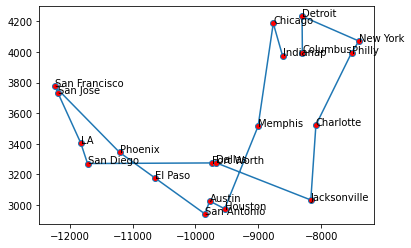

In [20]:
fig, ax1 = plt.subplots(ncols=1)
y=[3976,4187,3514,2976,3026,2942,3177,3344,3777,3733,3405,3271,3275,3277,3033,3522,3995,4071,4233,3996]
x=[-8615,-8762,-9004,-9536,-9774,-9849,-10644,-11207,-12241,-12188,-11824,-11716,-9733,-9679,-8165,-8084,-7516,-7400,-8304,-8299]
n=["Indianap","Chicago","Memphis","Houston","Austin","San Antonio","El Paso","Phoenix","San Francisco","San Jose","LA","San Diego","Fort Worth","Dallas","Jacksonville","Charlotte","Philly","New York","Detroit","Columbus"]
ax1.plot(x, y, marker="o", markerfacecolor="r")
for i, txt in enumerate(n):
    ax1.annotate(txt, (x[i], y[i])) 


In [21]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    """
    This function should be very similar to the geneticAlgorithm function defined above, but it should also create a plot 
    the distance of the best route as a function of how many generations have passed. Please implement it below.
    """

    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

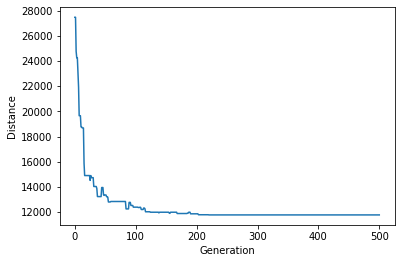

In [22]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)